<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-Feature-Engineering" data-toc-modified-id="EDA-and-Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Convert-and-Study-of-non-physical-variables-which-may-affect-saleprice" data-toc-modified-id="Convert-and-Study-of-non-physical-variables-which-may-affect-saleprice-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert and Study of non-physical variables which may affect saleprice</a></span><ul class="toc-item"><li><span><a href="#saleprice" data-toc-modified-id="saleprice-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>saleprice</a></span></li><li><span><a href="#Year-type-variables" data-toc-modified-id="Year-type-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Year-type variables</a></span></li><li><span><a href="#sale_type" data-toc-modified-id="sale_type-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>sale_type</a></span></li><li><span><a href="#mo_sold" data-toc-modified-id="mo_sold-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>mo_sold</a></span></li><li><span><a href="#Removing-variables-based-on-low-variability-criteria" data-toc-modified-id="Removing-variables-based-on-low-variability-criteria-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Removing variables based on low variability criteria</a></span></li></ul></li><li><span><a href="#Converting-Ordinal-Variables-to-Numeric-Form" data-toc-modified-id="Converting-Ordinal-Variables-to-Numeric-Form-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Converting Ordinal Variables to Numeric Form</a></span></li><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Imputing missing values</a></span><ul class="toc-item"><li><span><a href="#lot_frontage" data-toc-modified-id="lot_frontage-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>lot_frontage</a></span></li></ul></li><li><span><a href="#Eliminating-low-correlation-continuous-variables-from-model" data-toc-modified-id="Eliminating-low-correlation-continuous-variables-from-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Eliminating low correlation continuous variables from model</a></span></li><li><span><a href="#Feature-engineering-on-continuous-variables" data-toc-modified-id="Feature-engineering-on-continuous-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature engineering on continuous variables</a></span><ul class="toc-item"><li><span><a href="#Lot-Area-to-Log-Lot-Area" data-toc-modified-id="Lot-Area-to-Log-Lot-Area-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Lot Area to Log Lot Area</a></span></li></ul></li><li><span><a href="#Understanding-relationships-between-continuous-features" data-toc-modified-id="Understanding-relationships-between-continuous-features-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Understanding relationships between continuous features</a></span><ul class="toc-item"><li><span><a href="#Outside-area-based-variables" data-toc-modified-id="Outside-area-based-variables-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Outside area based variables</a></span></li><li><span><a href="#Quality-based-variables" data-toc-modified-id="Quality-based-variables-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Quality based variables</a></span></li><li><span><a href="#Indoor-area-based-variables" data-toc-modified-id="Indoor-area-based-variables-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Indoor area based variables</a></span></li></ul></li><li><span><a href="#Inspecting-and-eliminating-nominal-categorical-columns-from-model" data-toc-modified-id="Inspecting-and-eliminating-nominal-categorical-columns-from-model-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Inspecting and eliminating nominal categorical columns from model</a></span></li><li><span><a href="#Dummifying-all-categorical-columns" data-toc-modified-id="Dummifying-all-categorical-columns-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Dummifying all categorical columns</a></span></li></ul></li></ul></div>

## EDA and Feature Engineering

For this project, we may only look at correlations between predictors and saleprice. Our objective is to identify or create one highly correlated variable to represent every aspect of a property which may affect its price. As such, we will primarily work through this section deciding which columns to keep, and which to discard.


In [1]:
# Import necessary APIs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 101)

%matplotlib inline
# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# Import all text files
train = pd.read_csv('../datasets/train_cleaned.csv')
test = pd.read_csv('../datasets/test_cleaned.csv')

### Convert and Study of non-physical variables which may affect saleprice 

We can eliminate the extranous indices id and pid from train. For test, id is essential to the eventual submission. We will leave it in.

In [3]:
train = train.drop(['id', 'pid'], axis = 1)
test = test.drop(['pid'], axis = 1)

#### saleprice

As illustrated in the last section, saleprice has a right skew and should be converted into a more normal distribution. We will first attempt to log it. We will not do this for test since it does not have a saleprice column.

In [4]:
train['log_saleprice'] = train['saleprice'].map(lambda x: np.log(x))

In [5]:
train['log_saleprice'].describe()

count    2048.000000
mean       12.024551
std         0.411112
min         9.456341
25%        11.774039
50%        11.998433
75%        12.273731
max        13.323927
Name: log_saleprice, dtype: float64

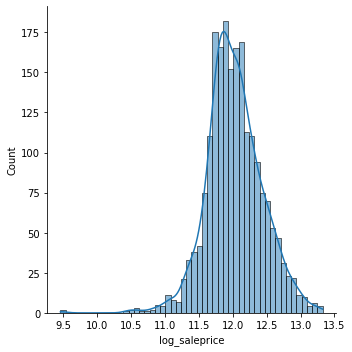

In [6]:
sns.displot(train['log_saleprice'], kde=True)

In [7]:
train = train.drop(['saleprice'], axis = 1)

There are 2 outliers with a very low log_saleprice. We will remove them from consideration.

In [8]:
train.loc[train['log_saleprice'] < 10.0, :]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,log_saleprice
183,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,9.480368
1626,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,9.456341


In [9]:
train = train.drop([183, 1626], axis = 0)

Let's take a quick look at log_saleprice vs its greatest continuous predictor.

In [10]:
# Loop through all numeric variables and find the biggest correlated variable
cont_variables = {}
for column in train.columns:
    try:
        cont_variables[column] = train['log_saleprice'].corr(train[column])
    except:
        pass
sorted(cont_variables, key=cont_variables.get, reverse=True)

['log_saleprice',
 'overall_qual',
 'gr_liv_area',
 'garage_cars',
 'garage_area',
 'year_built',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_remod_add',
 'garage_yr_blt',
 'full_bath',
 'totrms_abvgrd',
 'fireplaces',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'lot_frontage',
 'wood_deck_sf',
 'open_porch_sf',
 'half_bath',
 'lot_area',
 'bsmt_full_bath',
 '2nd_flr_sf',
 'bsmt_unf_sf',
 'bedroom_abvgr',
 'screen_porch',
 '3ssn_porch',
 'pool_area',
 'mo_sold',
 'bsmtfin_sf_2',
 'misc_val',
 'yr_sold',
 'bsmt_half_bath',
 'overall_cond',
 'low_qual_fin_sf',
 'ms_subclass',
 'kitchen_abvgr',
 'enclosed_porch']

<AxesSubplot:xlabel='gr_liv_area', ylabel='log_saleprice'>

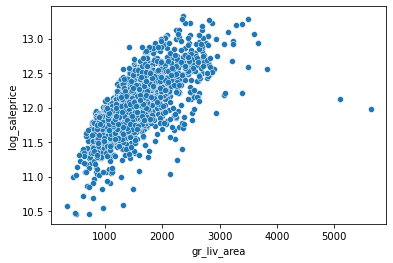

In [11]:
sns.scatterplot(data=train, y='log_saleprice', x='gr_liv_area')

There are two more outliers with above gr_liv_area we should take care of. They are unlikely to be useful in prediction. It is noted here that extremely large homes may have their prices decided via another algorithm.

In [12]:
train.loc[train['gr_liv_area'] > 5000.0, :]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,log_saleprice
960,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NaN,NaN,0,1,2008,New,11.982929
1882,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Elev,17000,10,2007,New,12.121875


In [13]:
train = train.drop([960, 1882], axis = 0)

#### Year-type variables

For year-type variables, we will instead look at each in terms of aging. For the purposes of this exercise, we will assume this year is this year, 2021.

Upon visual inspection, the year-type variables are:
1. year_remod_add
2. year_built
3. garage_yr_blt
4. yr_sold

In [14]:
# Convert year varaiables into age/time since type variables
year_columns = ['year_remod_add', 'year_built', 'garage_yr_blt', 'yr_sold']
for column in year_columns:
    train['yrs_since_' + column] = train[column].map(lambda x: 2021 - x)
    test['yrs_since_' + column] = test[column].map(lambda x: 2021 - x)

In [15]:
train.drop(year_columns, axis=1, inplace=True)
test.drop(year_columns, axis=1, inplace=True)

In [16]:
year_columns = ['yrs_since_' + elem for elem in year_columns]

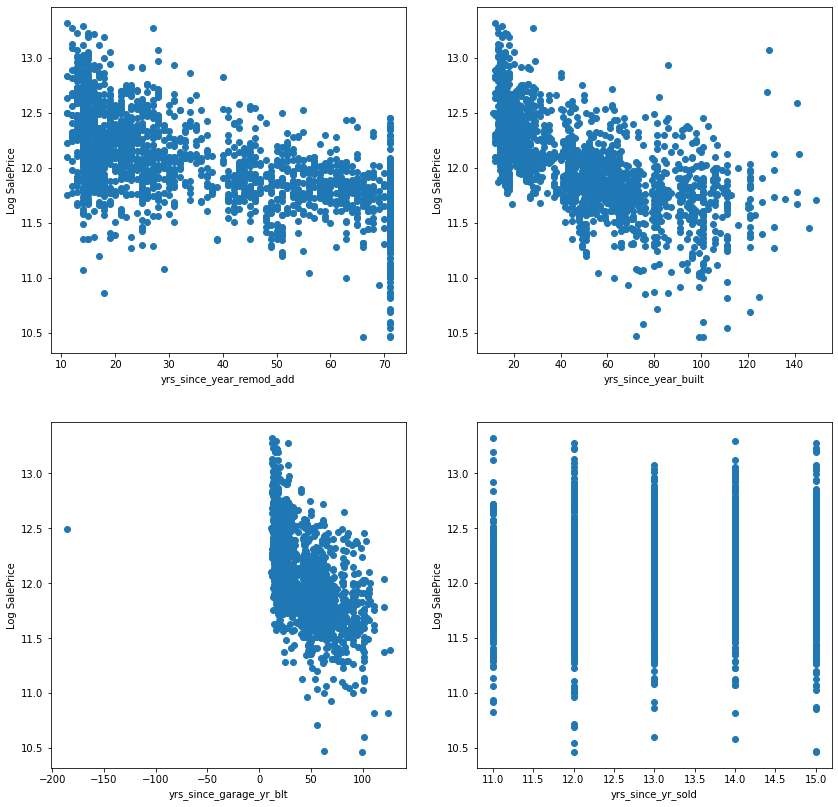

In [17]:
fig, ax = plt.subplots(2,2, figsize=(14,14))
ax = ax.ravel()
for index, column in enumerate(year_columns):
    ax[index].scatter(y = train['log_saleprice'], x = train[column])
    ax[index].set_xlabel(column)
    ax[index].set_ylabel("Log SalePrice")

**Observations**

There is a glaring outlier in the yrs_since_garage_yr_built plot. We will remove that row from consideration.

We can also visually infer from the scatterplot on the bottom right that yrs_since_yr_sold will have a low correlation with the target variable. We will remove it from consideration.


In [18]:
# Remove the outlier in yrs_since_garage_yr_blt and replace its value with what was in yrs_since_year_remod_add.
train.loc[(train['yrs_since_garage_yr_blt'] < 0), ['yrs_since_garage_yr_blt']] = train.loc[(train['yrs_since_garage_yr_blt'] < 0), ['yrs_since_year_remod_add']]

In [19]:
# Remove yrs_since_yr_sold
train = train.drop(['yrs_since_yr_sold'], axis = 1)
test = test.drop(['yrs_since_yr_sold'], axis = 1)
year_columns.pop(3)

'yrs_since_yr_sold'

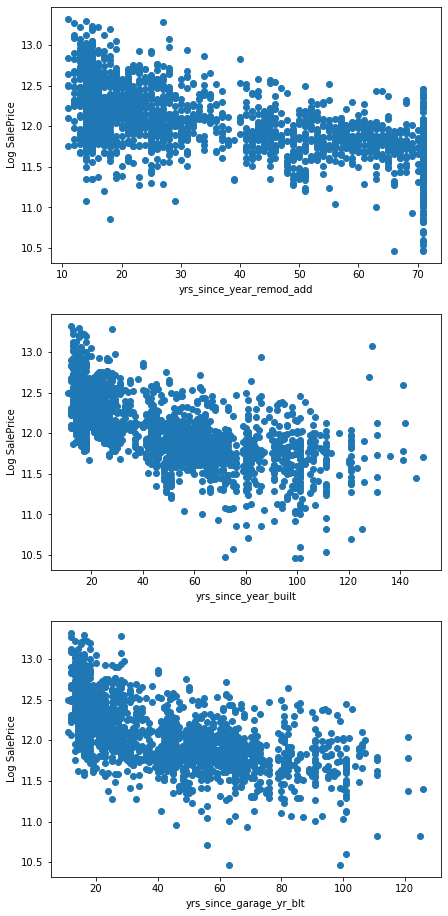

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(7,16))
ax = ax.ravel()
for index, column in enumerate(year_columns):
    ax[index].scatter(y = train['log_saleprice'], x = train[column])
    ax[index].set_xlabel(column)
    ax[index].set_ylabel("Log SalePrice")

#### sale_type

We expect that the sale type may be correlated with the eventual selling price of the home. We will study this here.

From Data Dictionary:
```
SaleType: Type of sale
WD Warranty Deed - Conventional
CWD Warranty Deed - Cash
VWD Warranty Deed - VA Loan
New Home just constructed and sold
COD Court Officer Deed/Estate
Con Contract 15% Down payment regular terms
ConLw Contract Low Down payment and low interest
ConLI Contract Low Interest
ConLD Contract Low Down
Oth Other
```

Sale type can affect the price of a house very drastically. Upon study, there are 3 main categories:
1. Warranty Deed (WD) type sales
2. Contract (Con) types
3. New (New) homes
4. COD types
5. Other

We will group them together and dummify them to take a look at a their correlations to saleprice via scatterplots.

In [21]:
# Combine WD and Con type cardinalities into groups
for term in ['WD', 'Con']:
    train['sale_type'] = train['sale_type'].map(lambda x: term if term in x else x)
    test['sale_type'] = test['sale_type'].map(lambda x: term if term in x else x)

In [22]:
train['sale_type'].value_counts()

WD     1787
New     158
COD      63
Con      32
Oth       4
Name: sale_type, dtype: int64

<AxesSubplot:xlabel='yrs_since_year_built', ylabel='log_saleprice'>

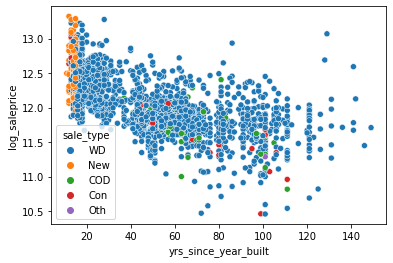

In [23]:
sns.scatterplot(x = train['yrs_since_year_built'], y = train['log_saleprice'],
           hue=train['sale_type'])

**Observations**

As expected, this graph shows that new homes sell for higher prices. However, this shows that sale_type will likely be highly correlated to yrs_since_year_built and will affect our prediction model. We will remove sale_type from consideration.

In [24]:
train.drop('sale_type', axis = 1, inplace=True)
test.drop('sale_type', axis = 1, inplace=True)

#### mo_sold

We will now determine how month sold affects log_saleprice.

In [25]:
train['mo_sold'].value_counts()

6     351
7     303
5     257
4     207
8     167
3     167
10    121
9     109
11    103
2     103
12     78
1      78
Name: mo_sold, dtype: int64

<AxesSubplot:xlabel='log_saleprice', ylabel='mo_sold'>

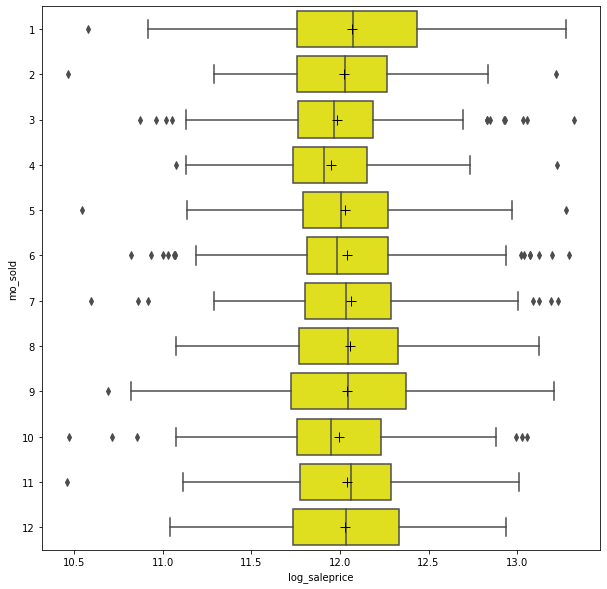

In [26]:
plt.figure(figsize=(10, 10))
sns.boxplot(
            y = 'mo_sold',
            x = 'log_saleprice',
            orient = 'h',
            data = train,
            color = 'yellow',
            showmeans=True, 
            meanprops={"marker": "+", 
                       "markeredgecolor": "black", 
                       "markersize": "10"}
                )

<AxesSubplot:xlabel='yrs_since_year_built', ylabel='log_saleprice'>

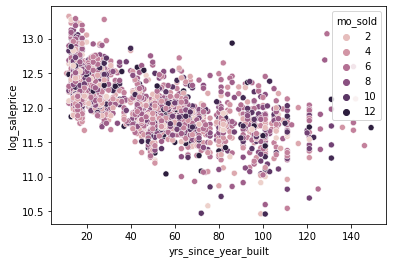

In [27]:
sns.scatterplot(x = train['yrs_since_year_built'], y = train['log_saleprice'],
           hue=train['mo_sold'])

From visual analysis of the above plots, we see that all months have very similar interquartile ranges. Their distribution curves against log_saleprice are expected to be very similar in shape. mo_sold is not expected to be a significant predictor of saleprice and will be dropped from our datasets.

In [28]:
train.drop(['mo_sold'], axis=1, inplace=True)
test.drop(['mo_sold'], axis=1, inplace=True)

#### Removing variables based on low variability criteria

We will first remove variables based on the following criteria:
1. For categorical values -- either, there are many entries in one (>85.0% of all entries)
2. Or, the number of non-NaN entries in the column is less than 15% of the total number of rows in the dataframe  

These features are unlikely to be highly effective on saleprice due to more than 85% of their values being in the same category without also overly increasing bias of the eventual model.

In [29]:
columns_to_drop = []
for _, column in train.iteritems():
    if (column.value_counts(normalize=True).sort_values(ascending=False).iloc[0] > .85):
        columns_to_drop.append(column.name)

In [30]:
columns_to_drop

['street',
 'land_contour',
 'utilities',
 'land_slope',
 'condition_1',
 'condition_2',
 'roof_matl',
 'exter_cond',
 'bsmt_cond',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'heating',
 'central_air',
 'electrical',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'kitchen_abvgr',
 'functional',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_feature',
 'misc_val']

In [31]:
# Check which variables are numerical and correlated to log_saleprice
for column in columns_to_drop:
    if train[column].dtype != object:
        print(column, train[column].corr(train['log_saleprice']))

bsmtfin_sf_2 0.02361653189724416
low_qual_fin_sf -0.052889207851317066
bsmt_half_bath -0.02865871499032402
kitchen_abvgr -0.14066260931042548
3ssn_porch 0.0553872687909263
screen_porch 0.12673486999459893
pool_area 0.03215489908980758
misc_val -0.00441161861611346


From the list above, we will keep several columns.
We will keep:
- exter_cond: Likely to be an important predictor of quality
- bsmt_cond: As above
- bsmtfin_type_2: Likely to be useful in conjunction with bsmtfin_type_1
- bsmtfin_sf_2: Likely to be useful in conjunction with bsmtfin_sf_1
- central_air: the only variable that addresses air conditioning
- paved_drive:  the only variable that addresses the finishing of the pavements outside home
- low_qual_fin_sf: likely to be negatively correlated to saleprice
- Both columns ending with porch: Can be aggregated into 1 total later
- sale_type: Showed to have a correlation with log_saleprice earlier

In [32]:
columns_to_keep = ['exter_cond', 'bsmt_cond', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'central_air', \
                   'paved_drive', 'low_qual_fin_sf', 'sale_type']

In [33]:
train = train.drop([column for column in columns_to_drop if column not in columns_to_keep], axis=1)
test = test.drop([column for column in columns_to_drop if column not in columns_to_keep], axis=1)

### Converting Ordinal Variables to Numeric Form

The data set has a few columns in an Ordinal Excellent - Poor (Ex - Po) format. We will find these and encode them in numerical form now.

In [34]:
# Function for order of categories based on grade
def ordinal_map(df_train, df_test, columns, ordered_list):
    '''
    Function converts a list and returns a dictionary of len(ordered_list) using ordinal encoder
    df: pd.Dataframe containing the columns
    columns: list of columns to be modified
    ordered_list: list of order elements starting with 0 to len(order_list)
    Returns modified df
    '''
    i = 0
    new_dict = {}
    for item in ordered_list:
        new_dict[item] = i
        i += 1
    
    for column in columns:
        df_train[column] = df_train[column].map(new_dict)
        df_test[column] = df_test[column].map(new_dict)
        
    return df_train[columns]

In [35]:
ex_po_ordinal_columns = [column for column in train if set(train[column].unique()).issubset(['TA', 'Gd', 'Fa', np.nan, 'Ex', 'Po'])]
ex_po_ordinal_columns

['exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'pool_qc']

In [36]:
ordinal_map(
    train, test,
    ex_po_ordinal_columns,
    [np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

,exter_qual,exter_cond,bsmt_qual,bsmt_cond,heating_qc,kitchen_qual,fireplace_qu,pool_qc
0,4,3,3,3,5,4,0,0
1,4,3,4,3,5,4,3,0
2,3,4,3,3,3,4,0,0
3,3,3,4,3,4,3,0,0
4,3,3,2,4,3,3,0,0
...,...,...,...,...,...,...,...,...
2043,4,3,4,3,5,4,4,0
2044,3,3,3,3,5,3,0,0
2045,3,3,3,3,4,3,3,0
2046,3,3,3,3,3,3,4,0


Are there any more ordinal variables? Let's find them by using a simple search for unique values being lower than 28 (number of unique values in 'neighborhood' according to data dictionary)

In [37]:
other_possible_ordinal_vars = [column for column in train if ( \
                        (len(train[column].unique()) < 28) & \
                        (column not in ex_po_ordinal_columns) \
                        )]
other_possible_ordinal_vars
# Find variables which have fewer than 28 unique entries.

['ms_subclass',
 'ms_zoning',
 'alley',
 'lot_shape',
 'lot_config',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'central_air',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_type',
 'garage_finish',
 'garage_cars',
 'paved_drive',
 'fence']

Among the list above, and cross-referencing with the data dictionary, several are categorical features. We will handle them for later.

We will go through our ordinal variables 1-by-1.

Alley: Type of alley access to property
- Grvl Gravel
- Pave Paved
- NA No alley access

In [38]:
ordinal_map(
    train, test,
    ['alley'],
    [np.nan, 'Grvl', 'Pave'])

,alley
0,0
1,0
2,0
3,0
4,0
...,...
2043,0
2044,0
2045,0
2046,0


PavedDrive: Paved driveway
- Y Paved
- P Partial Pavement
- N Dirt/Gravel

In [39]:
ordinal_map(
    train, test,
    ['paved_drive'],
    ['N', 'P', 'Y'])

,paved_drive
0,2
1,2
2,2
3,2
4,0
...,...
2043,2
2044,2
2045,2
2046,2


CentralAir: Central air conditioning
- N No
- Y Yes

In [40]:
ordinal_map(
    train, test,
    ['central_air'],
    ['N', 'Y'])

,central_air
0,1
1,1
2,1
3,1
4,1
...,...
2043,1
2044,1
2045,1
2046,1


BsmtExposure: Walkout or garden level basement walls
- Gd Good Exposure
- Av Average Exposure (split levels or foyers typically score average or above)
- Mn Mimimum Exposure
- No No Exposure
- NA No Basement

In [41]:
ordinal_map(
    train, test,
    ['bsmt_exposure'],
    [np.nan, 'No', 'Mn', 'Av', 'Gd'])

,bsmt_exposure
0,1
1,1
2,1
3,1
4,1
...,...
2043,3
2044,1
2045,1
2046,1


bsmtfin_type_1 has a different rating system as well. We will encode it separately:

- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

In [42]:
ordinal_map(
    train, test,
    ['bsmtfin_type_1', 'bsmtfin_type_2'],
    [np.nan, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

,bsmtfin_type_1,bsmtfin_type_2
0,6,1
1,6,1
2,6,1
3,1,1
4,1,1
...,...,...
2043,6,1
2044,4,1
2045,1,1
2046,3,2


GarageType: Garage location
- 2Types More than one type of garage
- Attchd Attached to home
- Basment Basement Garage
- BuiltIn Built-In (Garage part of house - typically has room above garage)
- CarPort Car Port
- Detchd Detached from home
- NA No Garage

In [43]:
ordinal_map(
    train, test,
    ['garage_type'],
    [np.nan, 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types'])

,garage_type
0,5
1,5
2,1
3,3
4,1
...,...
2043,5
2044,1
2045,1
2046,5


GarageFinish: Interior finish of the garage
- Fin Finished
- RFn Rough Finished
- Unf Unfinished
- NA No Garage

In [44]:
ordinal_map(
    train, test,
    ['garage_finish'],
    [np.nan, 'Unf', 'RFn', 'Fin'])

,garage_finish
0,2
1,2
2,1
3,3
4,1
...,...
2043,3
2044,1
2045,1
2046,1


Fence: Fence quality
- GdPrv Good Privacy
- MnPrv Minimum Privacy
- GdWo Good Wood
- MnWw Minimum Wood/Wire
- NA No Fence

In [45]:
ordinal_map(
    train, test,
    ['fence'],
    [np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])

,fence
0,0
1,0
2,0
3,0
4,0
...,...
2043,0
2044,0
2045,0
2046,0


### Imputing missing values

#### lot_frontage

Is lot_frontage relevant to predicting log_saleprice?

In [46]:
train['lot_frontage'].corr(train['log_saleprice'])

0.3569349992536325

We know that lot_frontage has many NaN values from Section 1. We have evaluated that it is relevant to predicting log_saleprice and so we will have to impute lot_frontage to use it for our final model. From the heatmap, we know that it is closely related to lot_area.

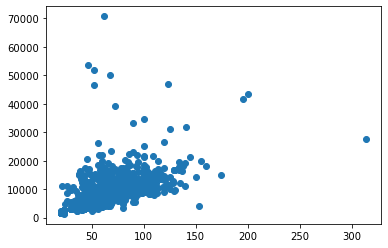

In [47]:
plt.scatter(train['lot_frontage'], train['lot_area'])

This should be better with lot_area being squared instead (**.5)

In [48]:
train_lot = pd.DataFrame(index=[], columns=[])
train_lot['lot_frontage'] = train['lot_frontage']
train_lot['lot_area_sqrt'] = train['lot_area'].map(lambda x: x**.5)

<AxesSubplot:>

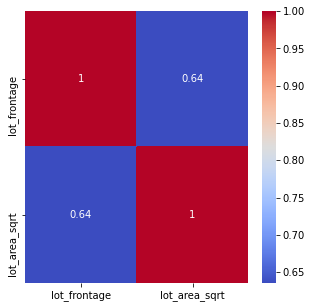

In [49]:
plt.figure(figsize=(5, 5))
sns.heatmap(train_lot.corr(),
           cmap='coolwarm',
           annot=True)

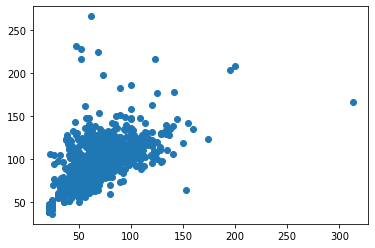

In [50]:
plt.scatter(train_lot['lot_frontage'], train_lot['lot_area_sqrt'])

We will create a simple Linear Regression to fit lot_frontage and lot_area_sqrt and use the coef and intercept to fill lot_frontage's NaN cells.

In [51]:
train_lot_dropna = train_lot.dropna()
# We will create the linear regression model with only rows for which 'lot_frontage'
# is not NaN (or Linear Regression would not work!). Thus, temporary dataframes are set up.
X = train_lot_dropna[['lot_area_sqrt']]
y = train_lot_dropna['lot_frontage']

In [52]:
lr = LinearRegression()
lr.fit(X, y)
train_lot['lot_frontage_preds'] = lr.predict(train_lot[['lot_area_sqrt']])
cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error').mean()

-302.5553528589678

In [53]:
train['lot_frontage'].describe()

count    1714.000000
mean       68.857060
std        22.483489
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

A negative mean squared error of around -300 implies an mean absolute error of about 17, about .75 of the standard deviation. This is an acceptable result. We will use this model to impute lot_frontage in train and set.

In [54]:
train_lot['lot_frontage_preds']

0       82.540696
1       76.603479
2       64.682294
3       71.233778
4       84.537626
          ...    
2043    76.471953
2044    79.154645
2045    63.326808
2046    73.183177
2047    63.107833
Name: lot_frontage_preds, Length: 2044, dtype: float64

In [55]:
train['lot_frontage'].fillna(train_lot['lot_frontage_preds'], inplace=True)

In [56]:
train['lot_frontage']

0       82.540696
1       43.000000
2       68.000000
3       73.000000
4       82.000000
          ...    
2043    79.000000
2044    79.154645
2045    57.000000
2046    80.000000
2047    60.000000
Name: lot_frontage, Length: 2044, dtype: float64

In [57]:
test_lot = pd.DataFrame(index=[], columns=[])
test_lot['lot_frontage'] = test['lot_frontage']
test_lot['lot_area_sqrt'] = test['lot_area'].map(lambda x: x**.5)
test_lot['lot_frontage_preds'] = lr.predict(test_lot[['lot_area_sqrt']])
test['lot_frontage'].fillna(test_lot['lot_frontage_preds'], inplace=True)

In [58]:
test['lot_frontage']

0      69.000000
1      70.768873
2      58.000000
3      60.000000
4      70.226687
         ...    
874    80.000000
875    90.000000
876    55.000000
877    60.000000
878    70.000000
Name: lot_frontage, Length: 879, dtype: float64

### Eliminating low correlation continuous variables from model

Before we go into categorical features, we will attempt to remove some numeric features to avoid unnecessary clutter.

We will use the criteria of relevant variables having a Pearson's correlation with 'log_saleprice' of 0.25 or more.
Since the lowest negative correlation is -0.6, we will remove variables negatively correlated to 'log_saleprice' with a correlation between 0 to -0.15. While we do this, we have to inspect each variable and ensure that we are not eliminating potentially relevant ones.

In [59]:
categorical_columns = train.loc[:, train.dtypes == np.object]
# The above code 
categorical_columns['ms_subclass'] = train['ms_subclass'].copy()
train_cont = train.drop(categorical_columns.columns, axis = 1)

<ipython-input-59-493201420e55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['ms_subclass'] = train['ms_subclass'].copy()


<AxesSubplot:>

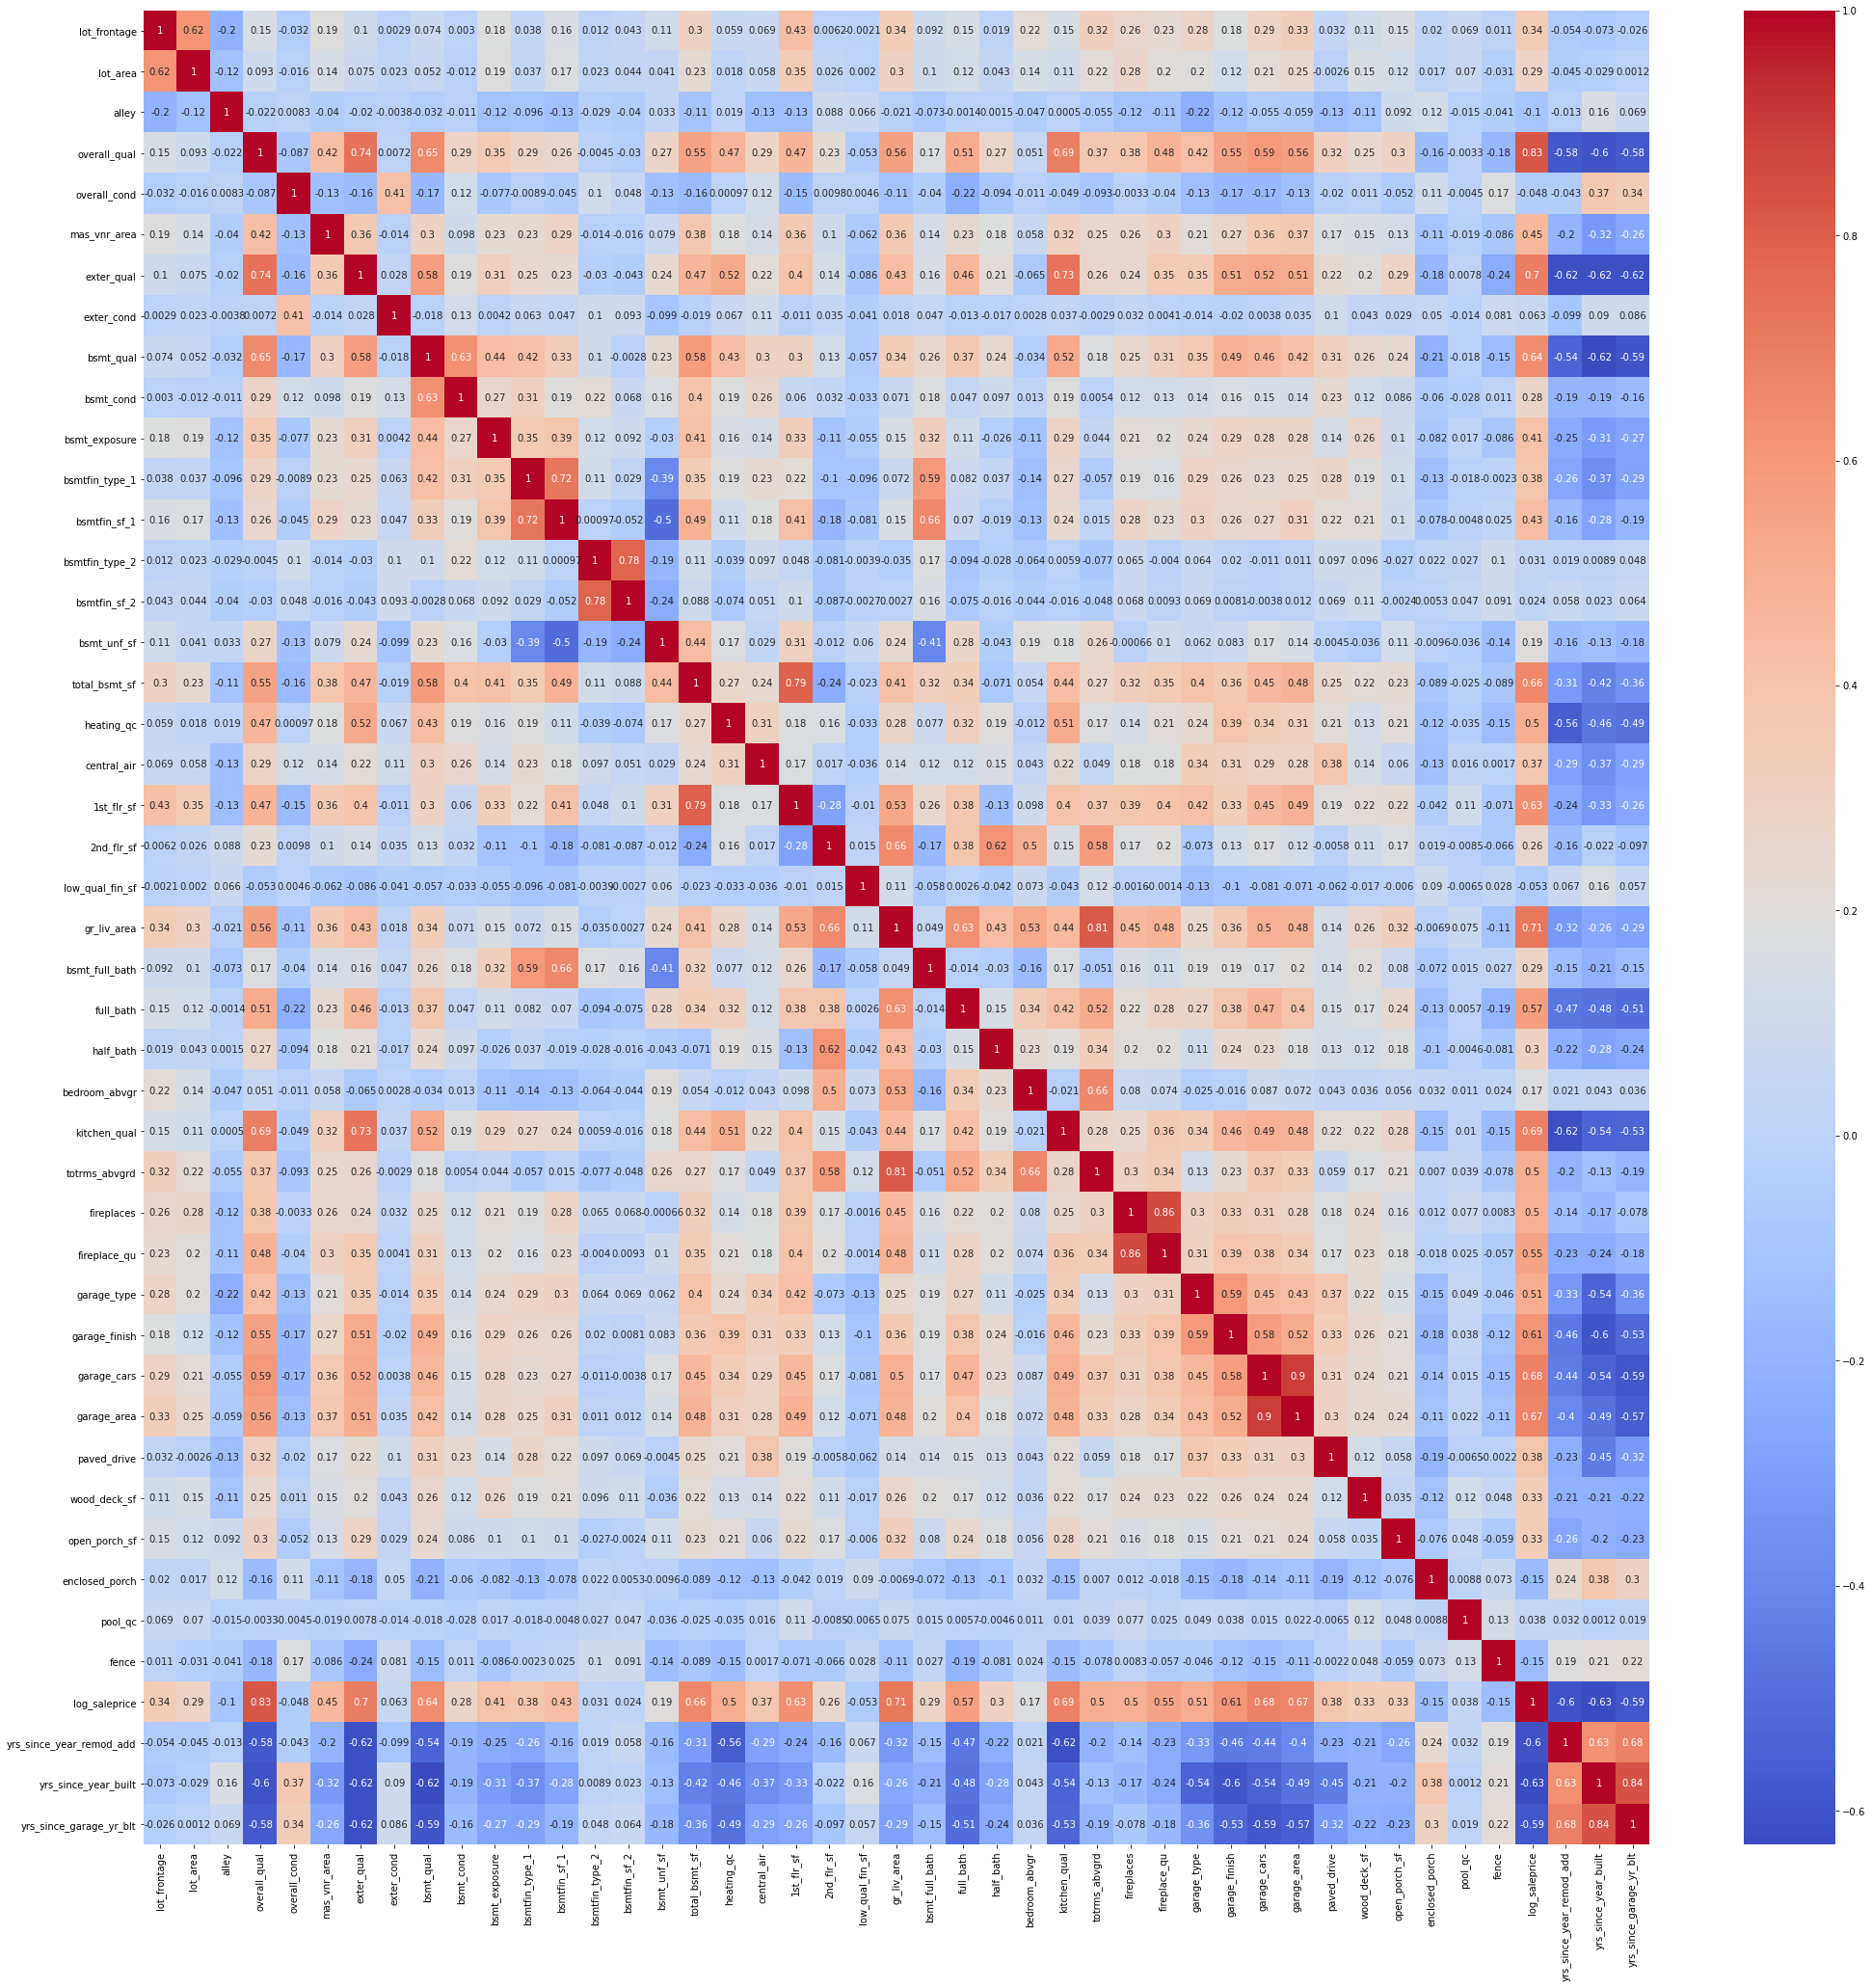

In [60]:
plt.figure(figsize=(35, 35))
sns.heatmap(train_cont.corr(), cmap='coolwarm', annot=True)

To help identify columns to eliminate based on our above criteria, we will use a function to list the columns which meet them.

In [61]:
def columns_to_drop_from_corr(df, target, pos_threshold, neg_threshold=0.0):
    '''
    Function does a loop through df and finds columns which meet threshold conditions
    df: the df to loop through = Dataframe type
    target: column name in df of the target var
    Returns a list of columns
    '''
    columns_to_drop = []
    for column in df:
        try:
            if (train[target].corr(train[column]) <= pos_threshold) & (train[target].corr(train[column]) >= neg_threshold):
                columns_to_drop.append(column)
        except:
            pass
    return columns_to_drop

In [62]:
columns_to_drop_from_corr(train_cont, 'log_saleprice', .25, -.15)

['alley',
 'overall_cond',
 'exter_cond',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'low_qual_fin_sf',
 'bedroom_abvgr',
 'pool_qc',
 'fence']

We will allow the above columns except 'fence' to be removed as they have other columns representing similar qualities about each house.

We will also remove a few columns for the following reasons:
1. yrs_since_garage_blt: If a garage is new, it is reflected in yrs_since_year_remod_add. It is otherwise typically built the same time as the house. The correlation between the 3 remaining year-based columns reflects this.
2. fireplace_qu: Highly correlated with fireplaces.
3. garage_area: Highly correlated to garage_cars -- obvious given that if the garage is more spacious, it can fit more cars.

In [63]:
columns_to_drop = columns_to_drop_from_corr(train_cont, 'log_saleprice', .25, -.15)

In [64]:
columns_to_drop.remove('fence')
# Do not remove fence

In [65]:
columns_to_drop.extend(['yrs_since_garage_yr_blt', \
                   'fireplace_qu', \
                   'garage_area'])
# Add the 3 identified variables to the list of columns to be removed

In [66]:
train = train.drop(columns_to_drop, axis = 1)
test = test.drop(columns_to_drop, axis = 1)

In [67]:
train_cont = train_cont.drop(columns_to_drop, axis = 1)

### Feature engineering on continuous variables

In this section we will test a combination/modify several features to obtain a better predictors.

#### Lot Area to Log Lot Area

Lot Area is logically expected to be a very good predictor of price. However, in our data set, it seems to not have a good correlation with log_saleprice.

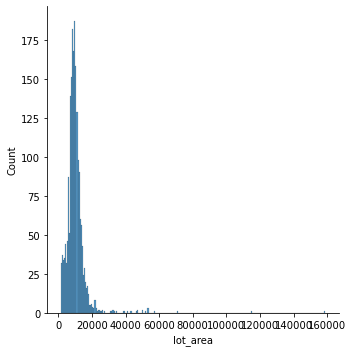

In [68]:
sns.displot(train['lot_area'])

In [69]:
train['lot_area'].describe()

count      2044.000000
mean      10024.789628
std        6615.153243
min        1300.000000
25%        7500.000000
50%        9402.500000
75%       11503.000000
max      159000.000000
Name: lot_area, dtype: float64

From the above stats, we can see that lot_area has a skewed distribution. It will likely perform better in a model with a log transformation.

In [70]:
train['log_lot_area'] = train['lot_area'].map(lambda x: np.log(x))
test['log_lot_area'] = test['lot_area'].map(lambda x: np.log(x))

In [71]:
train['log_lot_area'].corr(train['log_saleprice'])
# Improvement over 0.29

0.37319598744917143

In [72]:
columns_to_drop = ['lot_area']

We will use these engineered features in our eventual model and remove their constituents.

In [73]:
train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)

### Understanding relationships between continuous features

There seem to be several features which are likely to be very closely related and may present some colinearity problems. We will study them here.

#### Outside area based variables

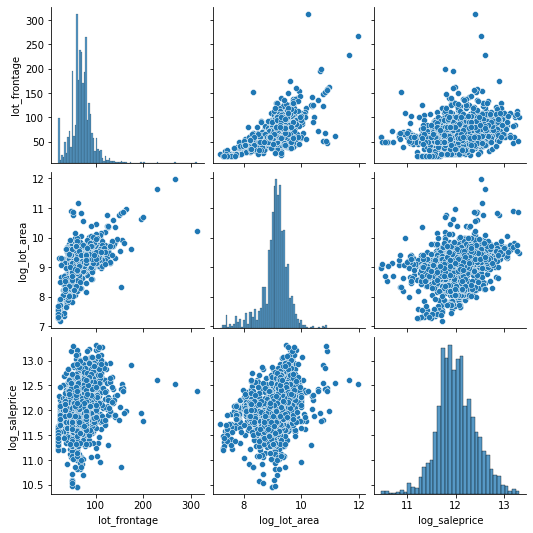

In [74]:
sns.pairplot(train[['lot_frontage', 'log_lot_area', 'log_saleprice']])

lot_frontage and log_lot_area will not seem to be an issue.

#### Quality based variables

<AxesSubplot:>

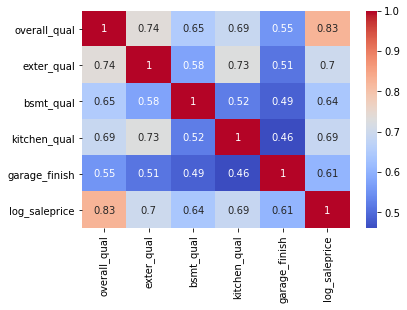

In [75]:
sns.heatmap(train[['overall_qual', 'exter_qual', 'bsmt_qual', 'kitchen_qual', 'garage_finish', 'log_saleprice']].corr(),
           cmap='coolwarm',
           annot=True)

There are many positive correlations between each variable. overall_qual is likely to be an aggregation (likely an average) of all other qualities. Let's test this.

<AxesSubplot:>

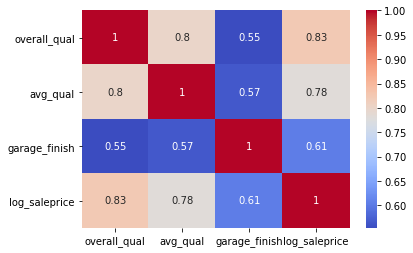

In [76]:
train['avg_qual'] = train['exter_qual'] + train['bsmt_qual'] + train['kitchen_qual']

sns.heatmap(train[['overall_qual', 'avg_qual', 'garage_finish', 'log_saleprice']].corr(),
           cmap='coolwarm',
           annot=True)

The correlation of the aggregated variable is very high. This could present issues for us in our model. We may not be able to use overall_qual and other quality type variables in the same model. We will study this in the next section.

#### Indoor area based variables

<AxesSubplot:>

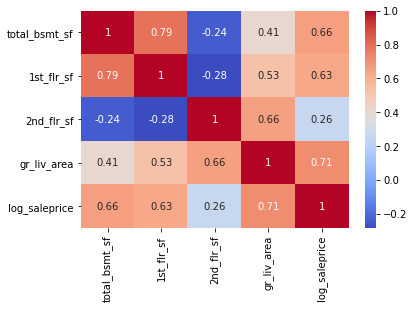

In [77]:
sns.heatmap(train[['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'log_saleprice']].corr(),
   cmap='coolwarm',
   annot=True)

Is gr_liv_area the sum of 1st_flr_sf and 2nd_flr_sf?

<AxesSubplot:>

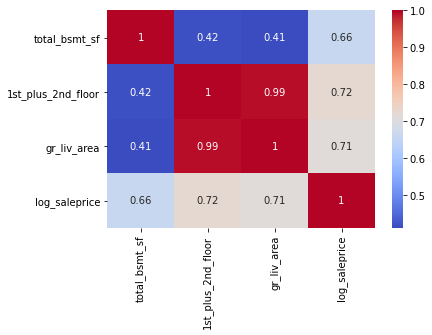

In [78]:
train['1st_plus_2nd_floor'] = train['1st_flr_sf'] + train['2nd_flr_sf']

sns.heatmap(train[['total_bsmt_sf', '1st_plus_2nd_floor', 'gr_liv_area', 'log_saleprice']].corr(),
   cmap='coolwarm',
   annot=True)

Yes! Again, we may not be able to use the individual area variables and gr_liv_area in the same model, especially since 2nd_flr_sf has a much lower correlation to log_saleprice (due to there being many 0s for 1-floor houses). gr_liv_area gives equal weightage to 1st_flr_area and 2nd_flr_area which may throw off our predictions. We will look into this in the next section.

In [79]:
train = train.drop(['1st_plus_2nd_floor', 'avg_qual'], axis = 1)

### Inspecting and eliminating nominal categorical columns from model

We will now inspect our categorical variables. To determine if they are useful predictors, we will look at boxplots of each of their categories against 'log_saleprice'. If the interquartile ranges of the boxplots are too similar, we will not use this column.

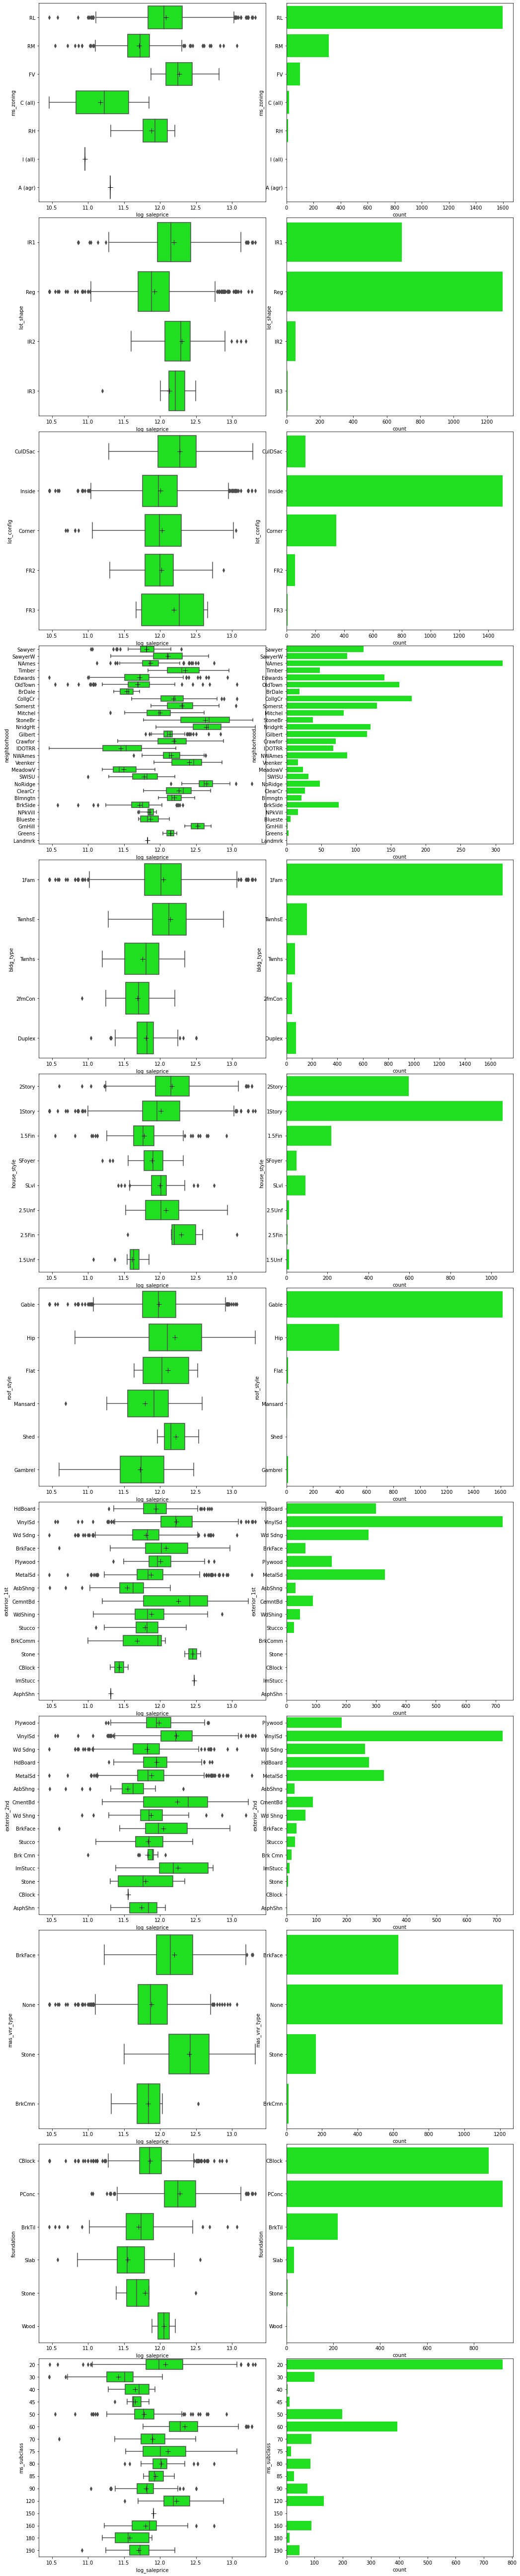

In [80]:
fig, axs = plt.subplots(nrows=len(categorical_columns.columns),ncols = 2,figsize=(14,6*len(categorical_columns.columns)))
fig.tight_layout()
# fig.suptitle("Categorical Values vs Saleprice / Counts")
for i in range(len(categorical_columns.columns)):
    sns.boxplot(
        x='log_saleprice',
        y=categorical_columns.columns[i],
        data=train,
        orient='h',
        showmeans=True, 
        meanprops={"marker": "+", 
                   "markeredgecolor": "black", 
                   "markersize": "10"},
        color = 'lime',
        ax=axs[i][0],
    )
    sns.countplot(
        y=categorical_columns.columns[i],
        data=train,
        orient='h',
        color = 'lime',
        ax=axs[i][1],
    )

From the plots above, we find that:
1. We will remove lot_config. The main reason is that the majority cardinalities have similar and overlapping distribution curves represented by the boxplots above.
2. We will also remove exterior_2nd due to having very similar plots to exterior_1st.
3. We note that ms_subclass is actually a combination of information in bldg_type and house_style. As such, it will be preserved with the other two removed.
3. We will get_dummies for all other categorical features.

In [82]:
columns_to_drop = ['bldg_type', 'house_style', 'lot_config', 'exterior_2nd']
train = train.drop(columns_to_drop, axis = 1)
test = test.drop(columns_to_drop, axis = 1)

In [83]:
categorical_columns = categorical_columns.drop(columns_to_drop, axis = 1)

### Dummifying all categorical columns

We will now get_dummies for all other categories.

In [84]:
train_dummies = pd.DataFrame()
test_dummies = pd.DataFrame()

Before converting into dummy variables, we will first do level combining to ensure that we do not get too many columns and reduce the effectiveness of our regression model.

For each column, we will allow the top cardinalities up to 90% of the total row count to have separate and unique columns, and combine the remaining into an 'Others' feature. 

In [85]:
# The code below uses value_count(normalized=True) to add up the percentages of the top cardinalities until
# the threshold is met. Then, all cardinalities which are outside of the threshold are grouped into an 'others'
# cardinality and combined
keep_index_dict = {}
# The above dict is used to re-apply our results to the test dataset
for column_name, series in categorical_columns.iteritems():
    keep_index_list = []
    tot_perc = 0
    for index, value in series.value_counts(normalize=True).sort_values(ascending=False).items():
        if tot_perc <= .9: 
            keep_index_list.append(index)
            tot_perc += value
            # if the majority categories still represent less than 90% of all values, add the next category
        else:
            break
            # break if conditions are met
    keep_index_dict[column_name] = keep_index_list
    train[column_name] = series.map(lambda x: 'others' if x not in keep_index_list else x)
    print(train[column_name].unique())
    
for column_name, index_list in keep_index_dict.items():
    test[column_name] = test[column_name].map(lambda x: 'others' if x not in index_list else x)

['RL' 'RM' 'others']
['IR1' 'Reg' 'others']
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'others'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'NoRidge' 'BrkSide']
['Gable' 'Hip' 'others']
['HdBoard' 'VinylSd' 'Wd Sdng' 'others' 'Plywood' 'MetalSd' 'CemntBd']
['BrkFace' 'None' 'others']
['CBlock' 'PConc' 'BrkTil' 'others']
[60 20 50 'others' 160 70 120 30 80]


In [86]:
# Create dummies and delete the original categorical columns
# train_dummies.drop(column_name, axis=1, inplace=True)
# test_dummies.drop(column_name, axis=1, inplace=True)
for column_name, values in categorical_columns.iteritems():
    train_dummies = pd.concat([train_dummies, pd.get_dummies(train[column_name], prefix=column_name, drop_first=True)], axis=1)
    test_dummies = pd.concat([test_dummies, pd.get_dummies(test[column_name], prefix=column_name, drop_first=True)], axis=1)

In [87]:
train_dummies.columns = train_dummies.columns.str.lower().str.replace(' ','_').str.replace('(', '_').str.replace(')', '')
test_dummies.columns = test_dummies.columns.str.lower().str.replace(' ','_').str.replace('(', '_').str.replace(')', '')

In [88]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2047
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ms_zoning_rm          2044 non-null   uint8
 1   ms_zoning_others      2044 non-null   uint8
 2   lot_shape_reg         2044 non-null   uint8
 3   lot_shape_others      2044 non-null   uint8
 4   neighborhood_collgcr  2044 non-null   uint8
 5   neighborhood_crawfor  2044 non-null   uint8
 6   neighborhood_edwards  2044 non-null   uint8
 7   neighborhood_gilbert  2044 non-null   uint8
 8   neighborhood_idotrr   2044 non-null   uint8
 9   neighborhood_mitchel  2044 non-null   uint8
 10  neighborhood_names    2044 non-null   uint8
 11  neighborhood_nwames   2044 non-null   uint8
 12  neighborhood_noridge  2044 non-null   uint8
 13  neighborhood_nridght  2044 non-null   uint8
 14  neighborhood_oldtown  2044 non-null   uint8
 15  neighborhood_sawyer   2044 non-null   uint8
 16  neighb

In [89]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ms_zoning_rm          879 non-null    uint8
 1   ms_zoning_others      879 non-null    uint8
 2   lot_shape_reg         879 non-null    uint8
 3   lot_shape_others      879 non-null    uint8
 4   neighborhood_collgcr  879 non-null    uint8
 5   neighborhood_crawfor  879 non-null    uint8
 6   neighborhood_edwards  879 non-null    uint8
 7   neighborhood_gilbert  879 non-null    uint8
 8   neighborhood_idotrr   879 non-null    uint8
 9   neighborhood_mitchel  879 non-null    uint8
 10  neighborhood_names    879 non-null    uint8
 11  neighborhood_nwames   879 non-null    uint8
 12  neighborhood_noridge  879 non-null    uint8
 13  neighborhood_nridght  879 non-null    uint8
 14  neighborhood_oldtown  879 non-null    uint8
 15  neighborhood_sawyer   879 non-null    uint8
 16  neighbor

In [91]:
for column_name, values in categorical_columns.iteritems():
    train.drop(column_name, axis=1, inplace=True)
    test.drop(column_name, axis=1, inplace=True)

train = pd.concat([train, train_dummies], axis=1)
test = pd.concat([test, test_dummies], axis=1)
# Concat dummy variables into main dataset after checking

In [92]:
train.columns.symmetric_difference(test.columns)
# Ensure that train and test sets still have the same number of columns

Index(['id', 'log_saleprice'], dtype='object')

We will now save our datasets and go into the next section.

In [93]:
train.to_csv('../datasets/train_final.csv', index=False)
test.to_csv('../datasets/test_final.csv', index=False)